In [13]:
%matplotlib inline

import pandas as pd
import numpy as np

# import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv(r"D:\Data\esc\Final data by year.csv")

df.head()

,Year,Country,Region,Song language,Artist,Song,English translation,Artist gender,Group/Solo,Place,...,Serbia,Serbia & Montenegro,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
0,2009,Lithuania,Former Socialist Bloc,"English, Russian",Sasha Son,"""Love""",?,Male,Solo,23,...,0,NaN,0,0,0,0,0,0,0,4
1,2009,Israel,Independent,"English, Hebrew, Arabic",Noa and Mira Awad,"""There Must Be Another Way""",?,Female,Group,16,...,0,NaN,5,0,0,0,1,0,1,0
2,2009,France,Western Europe,French,Patricia Kaas,"""Et s'il fallait le faire""",And if it had to be done,Female,Solo,8,...,3,NaN,0,7,3,0,7,0,3,1
3,2009,Sweden,Scandinavia,"English, French",Malena Ernman,"""La voix""",The voice,Female,Solo,21,...,0,NaN,0,0,0,NaN,0,0,0,0
4,2009,Croatia,Former Yugoslavia,Croatian,Igor Cukrov feat. Andrea,"""Lijepa Tena""",Beautiful Tena,Both,Group,18,...,5,NaN,0,6,0,0,0,0,0,0


In [80]:
df.columns = [c.replace('  ', '') for c in df.columns]

In [81]:
zip(range(df.shape[1]), df.columns)

[(0, 'Year'),
 (1, 'Country '),
 (2, 'Region'),
 (3, 'Song language'),
 (4, 'Artist '),
 (5, 'Song '),
 (6, 'English translation '),
 (7, 'Artist gender'),
 (8, 'Group/Solo'),
 (9, 'Place'),
 (10, 'Points'),
 (11, 'Host Country'),
 (12, 'Host region'),
 (13, 'Home/Away Country'),
 (14, 'Home/Away Region'),
 (15, 'Approximate Betting Prices'),
 (16, 'Albania '),
 (17, 'Andorra '),
 (18, 'Armenia '),
 (19, 'Austria'),
 (20, 'Azerbaijan '),
 (21, 'Belarus '),
 (22, 'Belgium '),
 (23, 'Bosnia and Herzegovina '),
 (24, 'Bulgaria '),
 (25, 'Croatia '),
 (26, 'Cyprus '),
 (27, 'Czech Republic '),
 (28, 'Denmark '),
 (29, 'Estonia '),
 (30, 'Finland '),
 (31, 'France '),
 (32, 'Georgia'),
 (33, 'Germany '),
 (34, 'Greece '),
 (35, 'Hungary '),
 (36, 'Iceland '),
 (37, 'Ireland '),
 (38, 'Israel '),
 (39, 'Latvia '),
 (40, 'Lithuania '),
 (41, 'Macedonia '),
 (42, 'Malta '),
 (43, 'Moldova '),
 (44, 'Monaco'),
 (45, 'Montenegro '),
 (46, 'Netherlands '),
 (47, 'Norway '),
 (48, 'Poland '),
 (49

In [50]:
df['tot_points'] = df.iloc[:, 16:].sum(1)

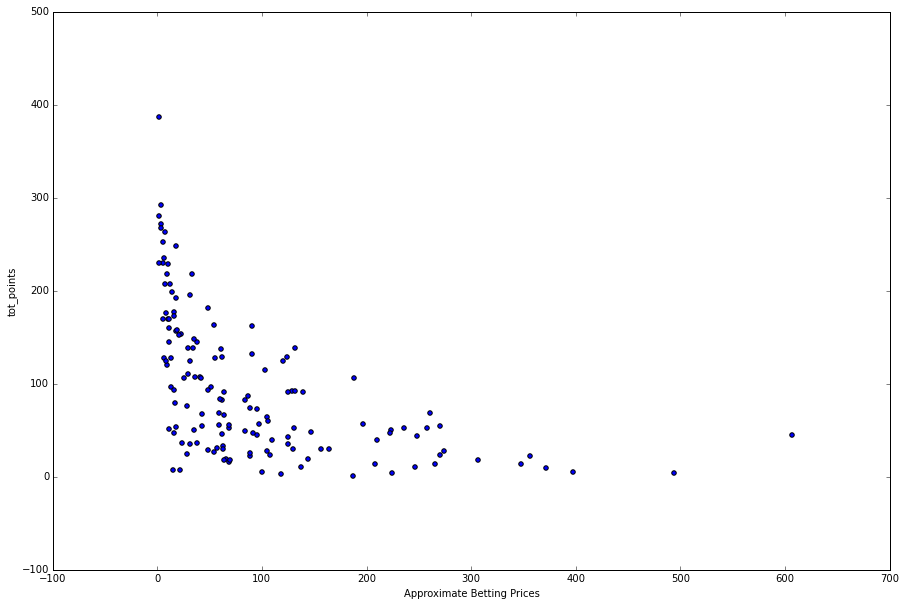

In [37]:
df[['Approximate Betting Prices', 'tot_points']].plot(x='Approximate Betting Prices', y='tot_points', 
                                                      figsize=[15,10], kind='scatter')

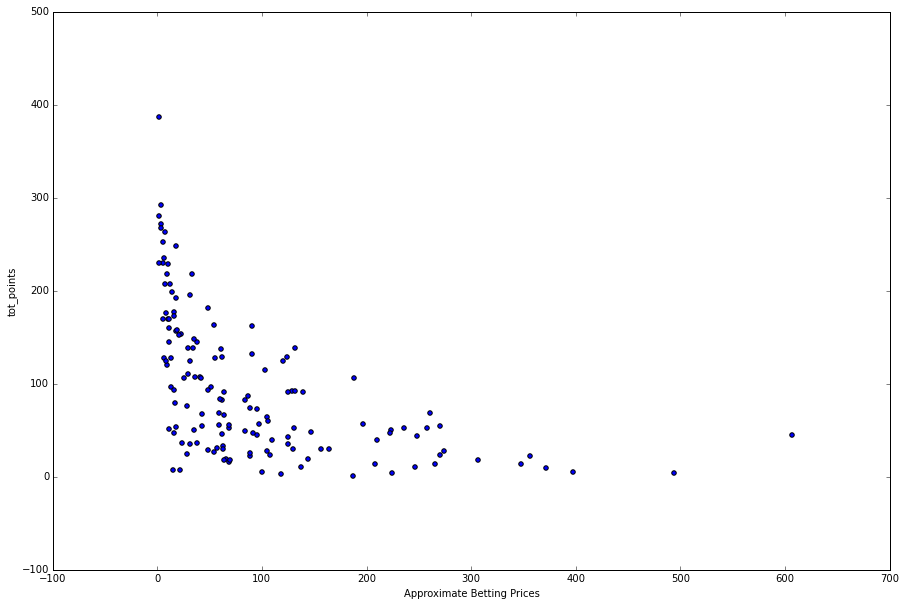

In [38]:
mask = (df['tot_points'] > 0) & (df['Approximate Betting Prices'] > 0)
df.ix[mask][['Approximate Betting Prices', 'tot_points']].plot(x='Approximate Betting Prices', y='tot_points', 
                                                      figsize=[15,10], kind='scatter')

In [36]:
df[df['Place'] == '2']['Approximate Betting Prices'].describe()

count     6.000000
mean     14.500000
std      10.821275
min       5.000000
25%       6.250000
50%      12.500000
75%      18.000000
max      33.000000
Name: Approximate Betting Prices, dtype: float64

In [34]:
df.sort('Place')[['Year', 'tot_points', 'Place', 'Approximate Betting Prices']].head(10)

,Year,tot_points,Place,Approximate Betting Prices
149,2003,167,1,NaN
66,2007,268,1,3
131,2004,280,1,2
116,2005,230,1,2
273,1998,172,1,NaN
90,2006,292,1,3
194,2002,176,1,NaN
257,1999,163,1,NaN
48,2008,272,1,3
232,2000,195,1,NaN


In [42]:
df['Place'] = df['Place'].apply(lambda x: int(x.replace('?', '')), 1)

In [45]:
df.groupby('Place')['Approximate Betting Prices'].describe().reset_index(name='val')\
    .pivot('Place', 'level_1', 'val')

level_1,25%,50%,75%,count,max,mean,min,std
Place,,,,,,,,
1,2.00,2.5,3.00,6,3,2.500000,2,0.547723
2,6.25,12.5,18.00,6,33,14.500000,5,10.821275
3,7.50,9.5,11.50,6,19,10.333333,5,4.885352
4,14.50,19.5,29.00,6,54,24.333333,8,16.548917
5,10.50,16.0,19.50,7,48,18.428571,5,14.105048
6,11.00,35.0,62.00,5,90,41.800000,11,34.186255
7,30.25,36.0,41.00,6,61,35.500000,9,17.002941
8,21.00,63.0,115.50,6,132,68.500000,13,53.791263
9,12.25,40.0,61.75,6,120,46.333333,6,43.278940


In [46]:
df.groupby('Approximate Betting Prices')['Place'].describe().reset_index(name='val')\
    .pivot('Approximate Betting Prices', 'level_1', 'val')

level_1,25%,50%,75%,count,max,mean,min,std
Approximate Betting Prices,,,,,,,,
2,1.00,1.0,1.00,3,1,1.000000,1,0.000000
3,1.00,1.0,1.00,3,1,1.000000,1,0.000000
5,2.50,3.0,4.00,3,5,3.333333,2,1.527525
6,3.75,5.5,7.25,2,9,5.500000,2,4.949747
7,2.25,2.5,2.75,2,3,2.500000,2,0.707107
8,5.25,6.5,7.75,2,9,6.500000,4,3.535534
9,4.00,5.0,6.00,2,7,5.000000,3,2.828427
10,3.50,4.0,4.50,2,5,4.000000,3,1.414214
11,5.75,6.0,9.00,4,18,8.750000,5,6.184658


In [59]:
df.groupby(['Artist gender', 'Group/Solo'])['tot_points'].count().reset_index().pivot('Artist gender', 'Group/Solo')

tot_points     
Group/Solo         Group Solo
Artist gender                
Both                  19  NaN
Female                 8   57
Male                  20   42

In [58]:
df.groupby(['Artist gender', 'Group/Solo'])['tot_points'].mean().reset_index().pivot('Artist gender', 'Group/Solo')

tot_points            
Group/Solo          Group        Solo
Artist gender                        
Both            61.578947         NaN
Female          77.375000  102.982456
Male           102.550000  100.285714

In [61]:
df.groupby(['Artist gender', 'Group/Solo'])['tot_points'].median().reset_index().pivot('Artist gender', 'Group/Solo')

tot_points      
Group/Solo         Group  Solo
Artist gender                 
Both                  45   NaN
Female                66  91.0
Male                  95  80.5

In [55]:
df.groupby(['Artist gender', 'Group/Solo'])['Place'].mean().reset_index().pivot('Artist gender', 'Group/Solo')

Place          
Group/Solo         Group      Solo
Artist gender                     
Both           15.789474       NaN
Female         14.500000  11.54386
Male           12.200000  12.47619

In [60]:
df.groupby(['Artist gender', 'Group/Solo'])['Place'].median().reset_index().pivot('Artist gender', 'Group/Solo')

Place      
Group/Solo    Group  Solo
Artist gender            
Both             16   NaN
Female           15  11.0
Male             11  11.5

In [71]:
countries = df.columns[16:-1]

df_co_cor = pd.DataFrame(index=countries, columns=['cor'])
for country in countries:
    df_co_cor.loc[country, 'cor'] = np.corrcoef(df[country].fillna(0), df['tot_points'])[0, 1]
    
df_co_cor.sort('cor', ascending=False)

,cor
Israel,0.6654726
Germany,0.6505245
Poland,0.6428108
Netherlands,0.6056955
Belarus,0.604193
Belgium,0.5765624
United Kingdom,0.5650175
Sweden,0.5565692
Ukraine,0.5532535
Finland,0.545098


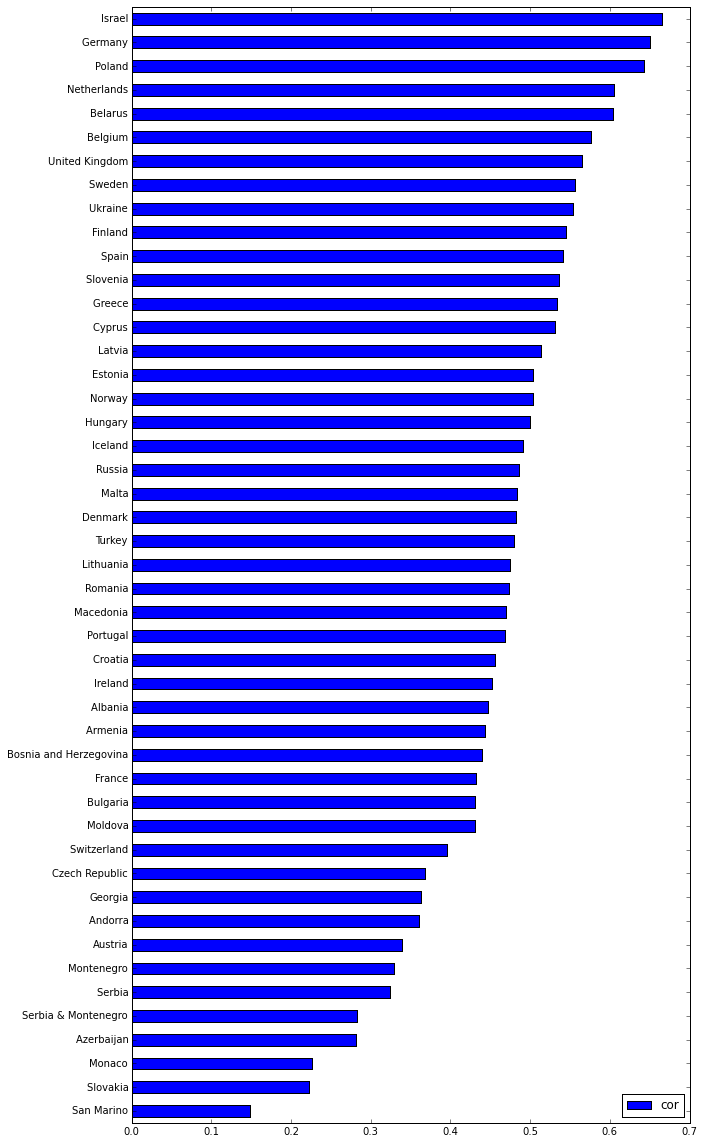

In [75]:
df_co_cor.sort('cor', ascending=True).plot(kind='barh', figsize=[10, 20])

In [87]:
df.groupby('Country ')['tot_points'].agg(['mean']).sort('mean', ascending=False)

,mean
Country,
Serbia,214.000000
Serbia and Montenegro,200.000000
Azerbaijan,169.500000
Bulgaria,157.000000
Ukraine,146.571429
Belarus,145.000000
Armenia,139.500000
Russia,135.300000
Greece,129.800000


In [86]:
df.groupby('Country ')['Place'].agg(['mean']).sort('mean', ascending=True)

,mean
Country,
Serbia,3.500000
Serbia and Montenegro,4.500000
Bulgaria,5.000000
Azerbaijan,5.500000
Belarus,6.000000
Russia,7.000000
Armenia,7.500000
Estonia,7.571429
Ukraine,8.142857


In [94]:
df.pivot('Year', 'Country ', 'tot_points').T

Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
Country,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,106,53,NaN,NaN,55,48
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129,138,199,92
Austria,NaN,65,34,NaN,26,101,9,NaN,NaN,NaN,NaN,NaN
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132,207
Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,NaN,NaN
Belgium,122,38,2,NaN,33,165,7,NaN,NaN,NaN,NaN,NaN
Bosnia and Herzegovina,NaN,86,NaN,29,33,27,91,79,229,106,110,106
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157,NaN,NaN
Croatia,131,118,70,42,44,29,50,115,56,NaN,44,45
